In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns
sns.set_style('ticks', {'axes.grid': True})
sns.set_context('poster', font_scale=2.0)
%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize'] = (12.8, 9.6)
plt.rcParams['figure.facecolor'] = 'white'

In [3]:
import pickle
import os
import scipy.optimize
import scipy.constants as sc

In [4]:
print(scipy.__version__)
print(sns.__version__)
print(matplotlib.__version__)

1.0.0
0.8.1
2.2.2


# import data and scales

In [5]:
with open('../data/dEeffs.pickle', 'rb') as f:
    dEeffs = pickle.load(f)

with open('../data/dEeffs_proj.pickle', 'rb') as f:
    dEeffs_proj = pickle.load(f)

In [6]:
hbarc = sc.hbar * sc.speed_of_light / sc.electron_volt / sc.femto / sc.mega # 197 MeV fm

In [7]:
ainv = 2.194e3 # lattice cutoff [MeV]
lat_unit = hbarc / ainv # lattice spacing [fm]

# plot

In [8]:
L = 48
ch = 'XiXi'
spin = '1S0'
rela = 'rela'
dEeffs_orig = {}
dEeffs_orig['wall'] = dEeffs[(L, 'wall', rela, ch, spin)]
dEeffs_orig['smeared'] = dEeffs[(L, 'smeared', rela, ch, spin)]


In [9]:
figs_dir = '../figs/projected_deltaEeff'
if not os.path.exists(figs_dir):
    os.makedirs(figs_dir)

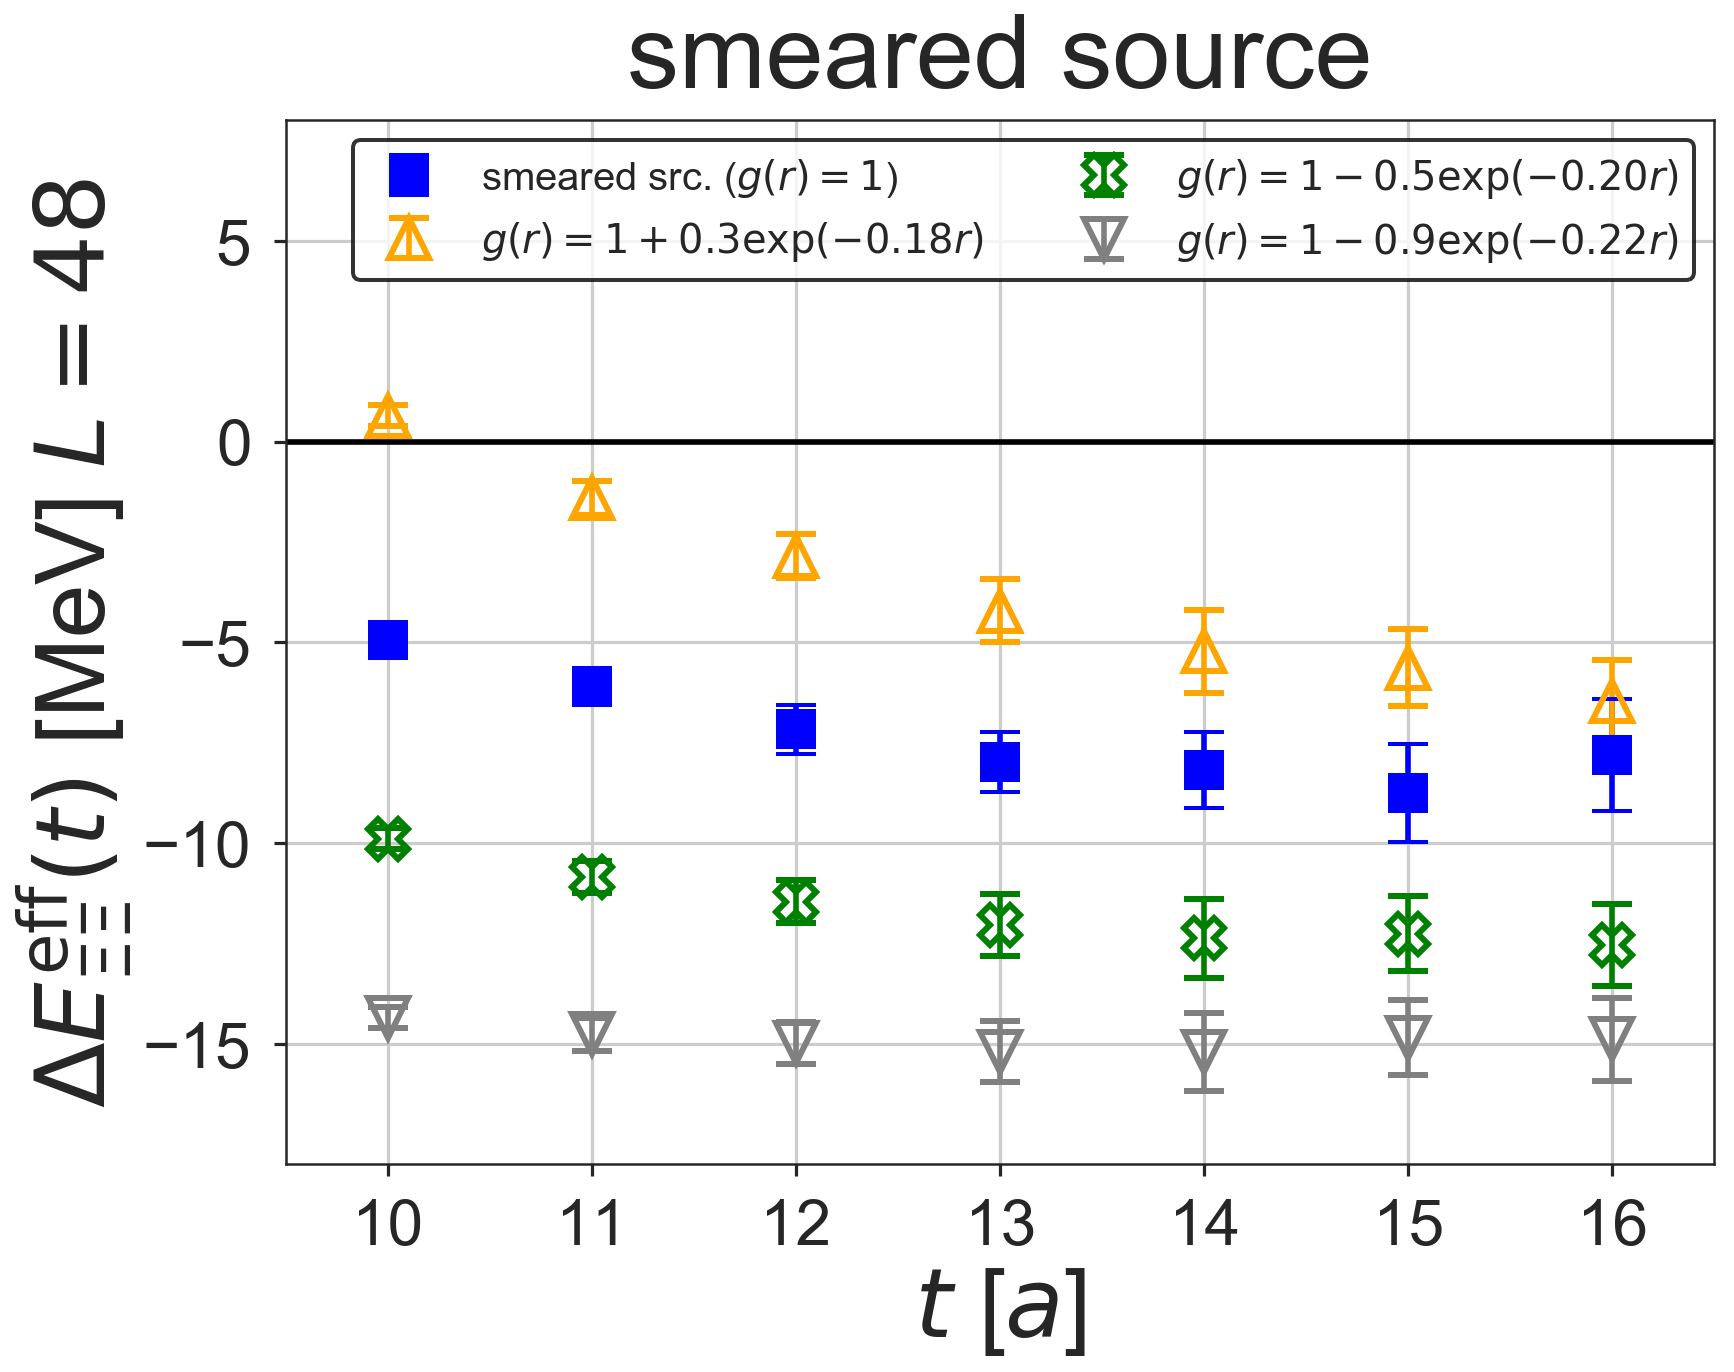

In [10]:
src = 'smeared'
fig, ax = plt.subplots()
ax.errorbar(dEeffs_orig[src][:,0], dEeffs_orig[src][:,3]*ainv, dEeffs_orig[src][:,4]*ainv, 
            fmt='bs', ms=20, capsize=10, capthick=2, label=r'smeared src. ($g(r) = 1$)')

for a, b, fmt, col in zip([0.3, -0.5, -0.9], [0.18, 0.20, 0.22], ['^', 'X', 'v'],
                         ['orange', 'green', 'grey']):
    xs, ys, yerrs = dEeffs_proj[(src, a, b)]
    ax.errorbar(xs, ys*ainv, yerrs*ainv,
               fmt=fmt, ms=20, capsize=10, capthick=2, color=col, mew=3.0, mfc='none',
                label=rf'$g(r) = 1 {a:+.1f}\exp(-{b:.2f}r)$')

ax.set_xlim(9.5, 16.5)
ax.set_ylim(-18, 8)
ax.axhline(0, color='black')
leg = ax.legend(ncol=2, frameon=True, fontsize=20)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(2.0)
ax.set_title('smeared source', fontsize=52, y=1.02)
ax.set_xlabel(r'$t$ [$a$]', fontsize=48)
ax.set_ylabel(r'$\Delta E_\mathrm{\Xi\Xi}^\mathrm{eff}(t)$ [MeV] $L = 48$', fontsize=48)
fig.savefig(f'{figs_dir}/delta_Eeff_XiXi_L48_smeared_proj.pdf', bbox_inches='tight')

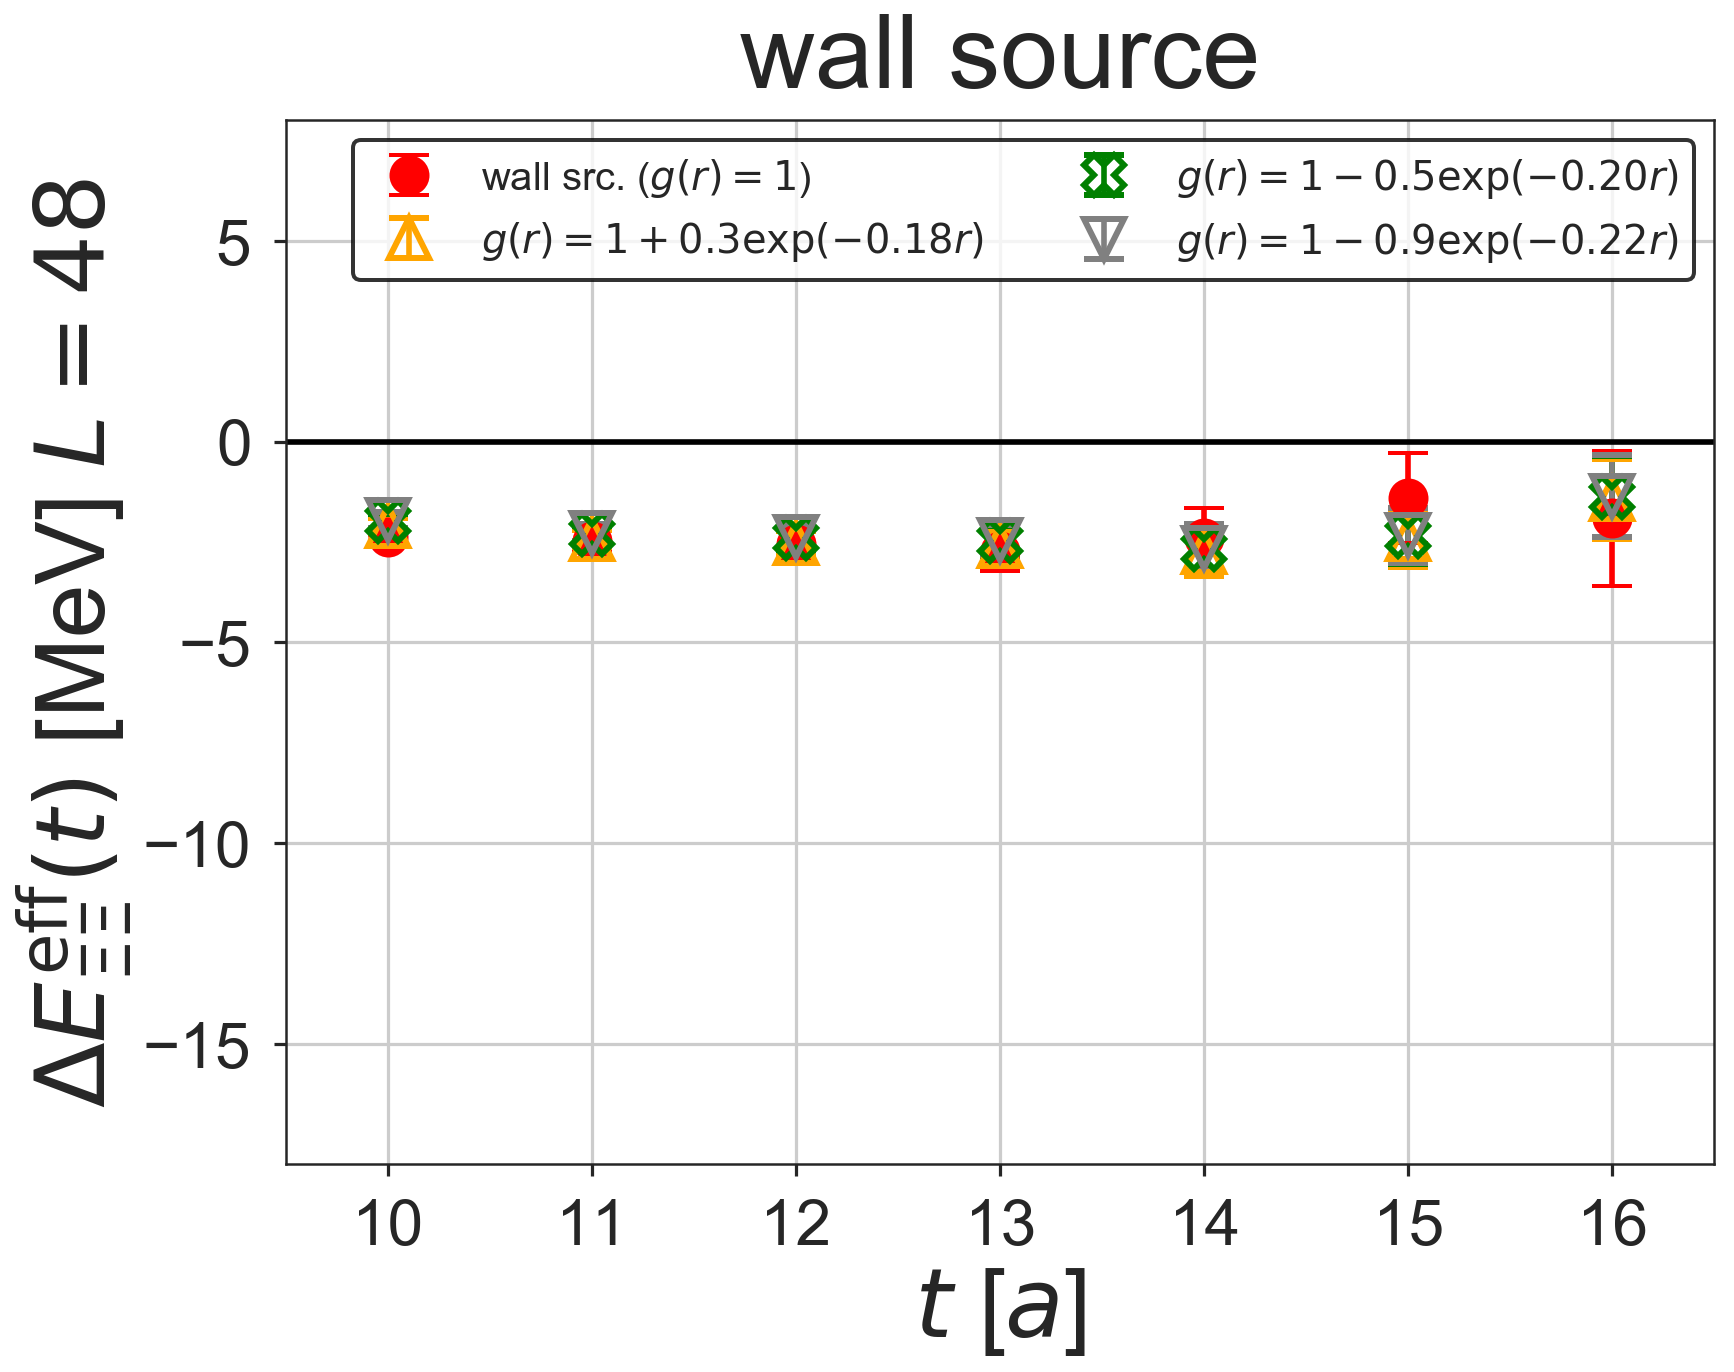

In [11]:
src = 'wall'
fig, ax = plt.subplots()
ax.errorbar(dEeffs_orig[src][:,0], dEeffs_orig[src][:,3]*ainv, dEeffs_orig[src][:,4]*ainv, 
            fmt='ro', ms=20, capsize=10, capthick=2, label=r'wall src. ($g(r) = 1$)')

for a, b, fmt, col in zip([0.3, -0.5, -0.9], [0.18, 0.20, 0.22], ['^', 'X', 'v'],
                         ['orange', 'green', 'grey']):
    xs, ys, yerrs = dEeffs_proj[(src, a, b)]
    ax.errorbar(xs, ys*ainv, yerrs*ainv,
               fmt=fmt, ms=20, capsize=10, capthick=2, color=col,
                mfc='none', mew=3.0, label=rf'$g(r) = 1 {a:+.1f}\exp(-{b:.2f}r)$')

ax.set_xlim(9.5, 16.5)
ax.set_ylim(-18, 8)
ax.axhline(0, color='black')
leg = ax.legend(ncol=2, frameon=True, fontsize=20)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(2.0)
ax.set_title('wall source', fontsize=52, y=1.02)
ax.set_xlabel(r'$t$ [$a$]', fontsize=48)
ax.set_ylabel(r'$\Delta E_\mathrm{\Xi\Xi}^\mathrm{eff}(t)$ [MeV] $L = 48$', fontsize=48)
fig.savefig(f'{figs_dir}/delta_Eeff_XiXi_L48_wall_proj.pdf', bbox_inches='tight')